In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi
import time

# evaluate r in barycentric rational form, product form and partial fraction form

In [2]:
n = 86
tol=1e-6
tolequi = 1e-3
w = rexpi.west(n,tol)
print("for n=%d and tol=%g, our error estimate suggests w=%f"%(n,tol,w))

print("... compute unitary best approximant")
t1=time.time()
r, info = rexpi.brib(w = w, n = n, tolequi = tolequi, info=1)
dt = time.time()-t1
print("used %d iterations, error = %.2e, deviation = %.2e"%(info['iterations'],info['err'],info['dev']))
print("runtime .. %fs"%dt)

for n=86 and tol=1e-06, our error estimate suggests w=242.438391
... compute unitary best approximant
used 11 iterations, error = 1.03e-06, deviation = 9.44e-04
runtime .. 0.079400s


In [3]:
print("... compute coefficients for product and partial fraction form")
t1=time.time()
a0, aj, sj = r.getpartialfractioncoef(sym=True)
poles = sj
dt = time.time()-t1
print("runtime .. %fs"%dt)

... compute coefficients for product and partial fraction form
runtime .. 0.004986s


In [4]:
k = 23000
xs = np.linspace(-1,1,k)

# compute reference solution
yref = np.exp(1j*w*xs)

print("evaluate r(ix) in barycentric rational form:")
yscalar = r(1j*xs)
print("approximation error max|r(ix)-exp(iwx)| = %.2e" % np.max(np.abs(yref-yscalar)))
print("error in unitarity  max||r(ix)|-1| = %.2e\n"%max(abs(abs(yscalar)-1)))

print("in product form:")
yratmat = rexpi.evalr_product_scalar(1j*xs, poles)
print("approximation error max|r(ix)-exp(iwx)| = %.2e" % np.max(np.abs(yref-yratmat)))
print("error in unitarity  max||r(ix)|-1| = %.2e\n"%max(abs(abs(yratmat)-1)))

yparfrac = rexpi.evalr_partialfraction_scalar(1j*xs, aj, sj)
errpf = np.max(np.abs(yref-yparfrac))
print("in partial fraction form")
print("approximation error max|r(ix)-exp(iwx)| = %.2e" % errpf)
print("error in unitarity  max||r(ix)|-1| = %.2e"%max(abs(abs(yparfrac)-1)))

evaluate r(ix) in barycentric rational form:
approximation error max|r(ix)-exp(iwx)| = 1.03e-06
error in unitarity  max||r(ix)|-1| = 3.33e-16

in product form:
approximation error max|r(ix)-exp(iwx)| = 1.03e-06
error in unitarity  max||r(ix)|-1| = 1.22e-14

in partial fraction form
approximation error max|r(ix)-exp(iwx)| = 1.03e-06
error in unitarity  max||r(ix)|-1| = 4.95e-10


### same computations can be done by defining a diagonal matrix and a ones vector

In [5]:
# define conjugate operator x -> conj(A)x
mv = lambda b : 1j*xs*b
# define shift-inverted operator s, x -> (A-s)^{-1}x
mvSI = lambda s,b : 1/(1j*xs-s)*b
b = np.ones(k)

yratmat = rexpi.evalr_product(mv, mvSI, b, poles)
print("in product form:\nmax|r(ix)-exp(iwx)| = %.2e" % np.max(np.abs(yref-yratmat)))
print("error in unitarity max||r(ix)|-1| = %.2e\n"%max(abs(abs(yratmat)-1)))

yparfrac = rexpi.evalr_partialfraction(mvSI, b, aj, sj)
print("in partial fraction form:\nmax|r(ix)-exp(iwx)| = %.2e" % errpf)
print("error in unitarity max||r(ix)|-1| = %.2e"%max(abs(abs(yparfrac)-1)))

in product form:
max|r(ix)-exp(iwx)| = 1.03e-06
error in unitarity max||r(ix)|-1| = 1.07e-14

in partial fraction form:
max|r(ix)-exp(iwx)| = 1.03e-06
error in unitarity max||r(ix)|-1| = 4.95e-10


### evaluate r(z) for $z\in\mathbb{R}$ in product and partial fraction form
plots show $\log_{10} |r(z)- \mathrm{e}^{\omega z}|$

In [6]:
nim=400
nre=151
ximag = np.linspace(-1.4, 1.4, nim)
xreal = np.linspace(-2.0, 0.4, nre)
X, Y = np.meshgrid(xreal, ximag)
zall = (X+1j*Y).flatten()

# evaluate in barycentric rational form
rz = r(zall)
errorvec = abs(rz-np.exp(w*zall))
Zbary = np.reshape(errorvec,(nim,nre))

# evaluate in product form
poles = r.getpoles()
rz = rexpi.evalr_product_scalar(zall, poles)
errorvec = abs(rz-np.exp(w*zall))
Zprod = np.reshape(errorvec,(nim,nre))

# evaluate in partial fraction form
a0, aj, sj = r.getpartialfractioncoef(sym=True)
rz = rexpi.evalr_partialfraction_scalar(zall, aj, sj)
errorvec = abs(rz-np.exp(w*zall))
Zpfe = np.reshape(errorvec,(nim,nre))


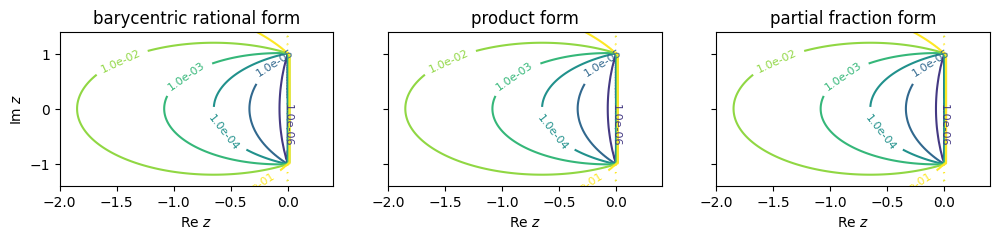

In [7]:
tagslist = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
fmt = lambda x : "%.1e"%x
    
#list(range(reftol,2))
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(12, 2))

ax1.title.set_text('barycentric rational form')
reftol = int(np.log10(tol))-1
CS = ax1.contour(X, Y, (Zbary), levels=tagslist, locator=plt.LogLocator())
ax1.clabel(CS, inline=1, fontsize=8, fmt=fmt)

ax2.title.set_text('product form')
CS = ax2.contour(X, Y, (Zprod), levels=tagslist, locator=plt.LogLocator())
ax2.clabel(CS, inline=1, fontsize=8, fmt=fmt)

ax3.title.set_text('partial fraction form')
CS = ax3.contour(X, Y, (Zpfe), levels=tagslist, locator=plt.LogLocator())
ax3.clabel(CS, inline=1, fontsize=8, fmt=fmt)
#ax4.set_axis_off()


ax1.set_ylabel("Im $z$")
ax1.set_xlabel("Re $z$");
ax2.set_xlabel("Re $z$");
ax2.axes.yaxis.set_ticklabels([])
ax3.set_xlabel("Re $z$");
ax3.axes.yaxis.set_ticklabels([])
#plt.title("approximation error $\log_{10}|r(z)-\mathrm{e}^{\omega z}|$, $n=%d$, $\omega\\approx %.4f$"%(n,w));

import tikzplotlib
figname = "errinC"
figscaling = 1.3
tikzheight, tikzwidth = figscaling*6, figscaling*8
tikzplotlib.save(figname+".tex", axis_height='{:.2f}cm'.format(tikzheight), axis_width = '{:.2f}cm'.format(tikzwidth))


### plots for abs(r(z))
plots show $\log_{10} |r(z)|$ where $r(z) \approx \mathrm{e}^{\omega z}$ is evaluated using barycentric rational, product and partial fraction form

In [ ]:
nim=800
nre=300
ximag = np.linspace(-2.4, 2.4, nim)
xreal = np.linspace(-0.03, 0.003, nre)
X, Y = np.meshgrid(xreal, ximag)
zall = (X+1j*Y).flatten()

# evaluate in barycentric rational form
rz = r(zall)
absvec = abs(rz)
Zabsbary = np.reshape(absvec,(nim,nre))

# evaluate in product form
poles = r.getpoles()
rz = rexpi.evalr_product_scalar(zall, poles)
absvec = abs(rz)
Zabsprod = np.reshape(absvec,(nim,nre))

# evaluate in partial fraction form
a0, aj, sj = r.getpartialfractioncoef(sym=True)
rz = rexpi.evalr_partialfraction_scalar(zall, aj, sj)
absvec = abs(rz)
Zabspfe = np.reshape(absvec,(nim,nre))

# reference
absvec = abs(np.exp(w*zall))
Zabsref = np.reshape(absvec,(nim,nre))

In [ ]:
#tagslist = [*list(np.linspace(-6,1,8)),0.9]
#tagslist = [-4,-3,-2,-1,-0.5,-0.1,-0.05,-0.01,0,1,2]
tagslist = [0.001,0.01,0.1,0.5,0.9,0.95,0.99,1,1.5]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10, 5))

ax1.title.set_text('barycentric rational form $\log_{10}|r(z)|$')
reftol = int(np.log10(tol))-1
CS = ax1.contour(X, Y, (Zabsbary), levels=tagslist)
ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_ylabel("Im $z$")
ax1.axes.xaxis.set_ticklabels([])

ax2.title.set_text('product form $\log_{10}|r(z)|$')
CS = ax2.contour(X, Y, (Zabsprod), levels=tagslist)
ax2.clabel(CS, inline=1, fontsize=10)
ax2.axes.yaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])

ax3.title.set_text('partial fraction form $\log_{10}|r(z)|$')
CS = ax3.contour(X, Y, (Zabspfe), levels=tagslist)
ax3.clabel(CS, inline=1, fontsize=10)
ax3.set_ylabel("Im $z$")
ax3.set_xlabel("Re $z$");

ax4.title.set_text('reference $\log_{10}|\mathrm{e}^{\omega z}|$')
CS = plt.contour(X, Y, (Zabsref), levels=tagslist)
ax4.clabel(CS, inline=1, fontsize=10)
ax4.axes.yaxis.set_ticklabels([])
ax4.set_xlabel("Re $z$");


#plt.title("approximation error $\log_{10}|r(z)-\mathrm{e}^{\omega z}|$, $n=%d$, $\omega\\approx %.4f$"%(n,w));

import tikzplotlib
figname = "errinC"
figscaling = 1.3
tikzheight, tikzwidth = figscaling*6, figscaling*8
tikzplotlib.save(figname+".tex", axis_height='{:.2f}cm'.format(tikzheight), axis_width = '{:.2f}cm'.format(tikzwidth))
